In [32]:
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from keras.models import load_model
from keras import backend as K
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
import cv2

In [33]:

# CUSTOM LOSS Function must be declared and is included in the scope while loading the model
# ERROR:
# ValueError: Unknown loss function: 'weighted_loss'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope.

import tensorflow as tf
def get_weighted_loss_binary(pos_weights, neg_weights, epsilon=1e-7):
    def weighted_loss(y_true, y_pred):
        loss = 0.0
        #we add epsilon to avoid an error if y_pred (is 0)
        loss +=(-1*pos_weights*y_true* K.log(y_pred+epsilon)+ \
            -1*neg_weights*(1-y_true)* K.log(1-y_pred+epsilon))
        return loss
    return weighted_loss

custom_objects = {'weighted_loss': get_weighted_loss_binary}

# Loading The Model

In [34]:

model = load_model('VGG_16_udpated_loss_(3-97.92)-Model_Best.h5', custom_objects=custom_objects)
img_path=root_path + '\Pneumonia_Images\Pneumonia\00010447_018.png'
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [35]:
img=image.load_img(img_path,target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
x= x/ 255.0
img_data=(x)


In [36]:
imager=Image.open(img_path)
image1=np.array(imager)
x=np.expand_dims(x, axis=0)
image2 = cv2.resize(image1, (224, 224))  # Resize image to standard size of 256x256 pixels
image3 = image2 / 255.0  # Normalize pixel values to range [0, 1] for optimal deep learning performance
image=np.array(image3)
# image=np.array(image)
print(image.shape)
# test_image= image

(224, 224)


In [44]:
classes=model.predict(img_data)
result=int(classes[0])
print(result)
print(classes)
# layer_output = model.get_layer("dense").output
# print(layer_output)


1/1 [==============================] - 0s 185ms/step
0
[[0.96459496]]


In [45]:
print(classes)
if classes > 0.5:
    print("Person is Affected By PNEUMONIA")
else:
    print("Result is Normal")

[[0.96459496]]
Person is Affected By PNEUMONIA


# Testing 


1/1 [==============================] - 0s 167ms/step
0.025759548
0.043380894
0.0021991145
0.0064541386
0.02976311
0.9994168
0.9993108
0.22983676
0.9609505
0.99988455


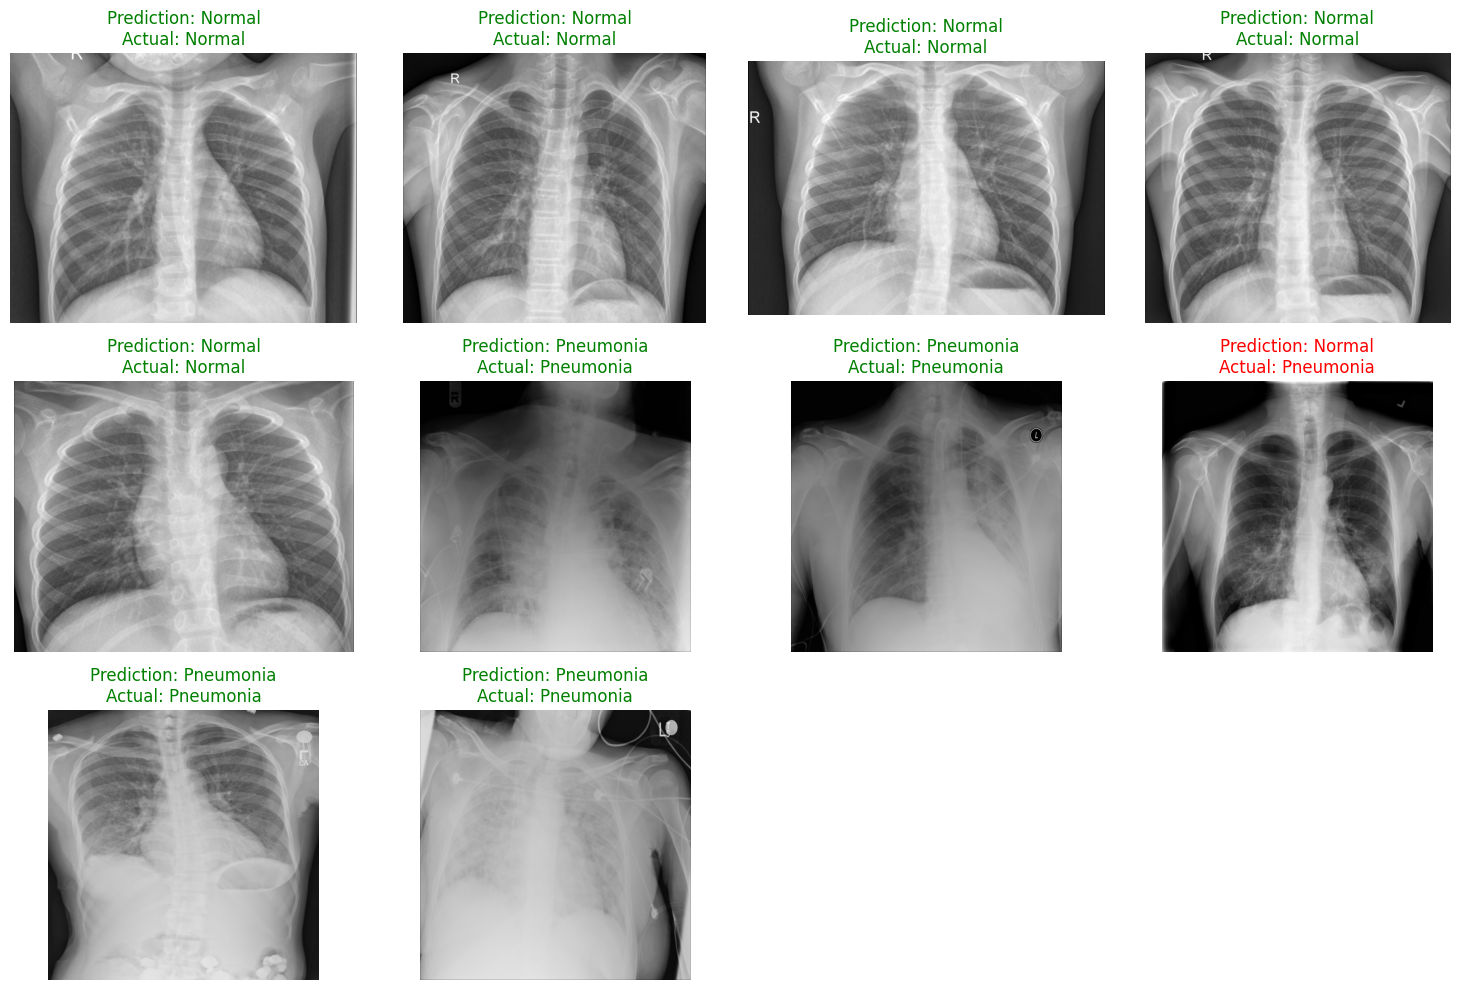

In [48]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Function to load and preprocess an image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array/ 255.0
    return img_array

# Function to predict the condition
def predict_condition(img_path):
    preprocessed_img = preprocess_image(img_path)
    prediction = model.predict(preprocessed_img)
    return prediction

# Function to display the result
def display_results(image_results):
    num_images = len(image_results)
    num_cols = 4
    num_rows = (num_images // num_cols) + (1 if num_images % num_cols != 0 else 0)
    
    plt.figure(figsize=(15, 10))
    
    for i, (img_path, prediction, actual) in enumerate(image_results, 1):
        plt.subplot(num_rows, num_cols, i)
        img = image.load_img(img_path)
        plt.imshow(img)
        if prediction > 0.5:
            prediction_label = "Pneumonia"
            prediction_color = 'red' if actual != 'Pneumonia' else 'green'
        else:
            prediction_label = "Normal"
            prediction_color = 'red' if actual != 'Normal' else 'green'
            
        plt.title('Prediction: {}'.format(prediction_label), color=prediction_color)
        plt.title('Prediction: {}\nActual: {}'.format("Pneumonia" if prediction > 0.5 else "Normal", actual))
        plt.axis('off')
        print(prediction)
    plt.tight_layout()
    plt.show()

# Path to the test folder
test_folder = '\Images'  # Replace 'path_to_test_folder' with the path to your test folder

# List of subfolders in the test folder
subfolders = ['Normal','Pneumonia']

# Pick 10 random images from each category and store the results
image_results = []

for subfolder in subfolders:
    images_path = os.path.join(test_folder, subfolder)
    images_list = os.listdir(images_path)
    random_images = random.sample(images_list, 5)
    for image_file in random_images:
        image_path = os.path.join(images_path, image_file)
        prediction = predict_condition(image_path)
        image_results.append((image_path, prediction[0,0], subfolder))

# Display the results in a grid
display_results(image_results)


In [41]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     